# Titanic with Keras

In [36]:
import numpy as np
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Flatten, Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint

## Setup

In [3]:
DATA_HOME_DIR = "/user/rh186032/datasciencecoursera/TitanicML/input/"

raw_data = pd.read_csv(DATA_HOME_DIR + 'train.csv', index_col=0)
test_data = pd.read_csv(DATA_HOME_DIR + 'test.csv', index_col=0)

In [14]:
test_ind = test_data.index

data= raw_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].dropna()
t_data = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [15]:
Pclass = pd.get_dummies(data['Pclass'])
Pclass.columns=['1st','2nd','3rd']
Pclass = Pclass.drop('1st',axis=1)

tPclass = pd.get_dummies(t_data['Pclass'])
tPclass.columns=['1st','2nd','3rd']
tPclass = tPclass.drop('1st',axis=1)

Sex = pd.get_dummies(data['Sex'])
Sex = Sex.drop('male',axis=1)

tSex = pd.get_dummies(t_data['Sex'])
tSex = tSex.drop('male',axis=1)

def adult_kids(age):
    if age > 18:
        if age > 60:
            return  'older'
        else :
            return   'adult'
    else :
        if age < 18:
            return   'kids'
        else :
            return np.nan

data['adult_kids'] = data['Age'].apply(adult_kids)
Age_cat = pd.get_dummies(data['adult_kids']).drop('adult',axis=1)
t_data['adult_kids'] = t_data['Age'].apply(adult_kids)
tAge_cat = pd.get_dummies(t_data['adult_kids']).drop('adult',axis=1)

Data_tmp = data[['Survived','SibSp','Parch','Fare']]

Merge_data = pd.merge(Data_tmp,Pclass,right_index=True,left_index=True)
Merge_data = pd.merge(Merge_data,Sex,right_index=True,left_index=True)
Merge_data = pd.merge(Merge_data,Age_cat,right_index=True,left_index=True)
y = Merge_data['Survived'].values
x = Merge_data.drop('Survived',axis=1).values

Data_tmp = t_data[['SibSp','Parch','Fare']]

Merge_data = pd.merge(Data_tmp,tPclass,right_index=True,left_index=True)
Merge_data = pd.merge(Merge_data,tSex,right_index=True,left_index=True)
Merge_data = pd.merge(Merge_data,tAge_cat,right_index=True,left_index=True)
tx = Merge_data

(x.shape, y.shape, tx.shape)

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


((714, 8), (714,), (418, 8))

## Build a model

In [21]:
# create model
model = Sequential()
model.add(Dense(64, input_shape=(8,)))

for i in range(0, 8):
    model.add(Dense(units=64))
    model.add(Activation('relu'))

model.add(Dense(units=1))
model.add(Activation('softmax'))

#model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
m_epochs = 256

In [37]:
filepath = DATA_HOME_DIR+'checkpoints/weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [53]:
#history = model.fit(x, y, epochs = m_epochs)

history = model.fit(x=x, y=y, batch_size=64, epochs=64, verbose=1, 
                    callbacks=callbacks_list, 
                    validation_split=0.0, 
                    validation_data=None, 
                    shuffle=True, 
                    class_weight=None, 
                    sample_weight=None, 
                    initial_epoch = 0)


loss_history = history.history['loss']
acc_history = history.history['acc']

Epoch 1/64
714/714 [==============================] - 0s - loss: 0.1163     
Epoch 2/64
714/714 [==============================] - 0s - loss: 0.1047     
Epoch 3/64
714/714 [==============================] - 0s - loss: 0.0985     
Epoch 4/64
714/714 [==============================] - 0s - loss: 0.1060     
Epoch 5/64
714/714 [==============================] - 0s - loss: 0.1008     
Epoch 6/64
714/714 [==============================] - 0s - loss: 0.0987     
Epoch 7/64
714/714 [==============================] - 0s - loss: 0.0986     
Epoch 

/usr/lib64/python3.4/site-packages/keras/callbacks.py:388: RuntimeWarning: Can save best model only with acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)



Epoch 9/64
714/714 [==============================] - 0s - loss: 0.0985     
Epoch 10/64
714/714 [==============================] - 0s - loss: 0.1042     
Epoch 11/64
714/714 [==============================] - ETA: 0s - loss: 0.0662 - 0s - loss: 0.0981     
Epoch 12/64
714/714 [==============================] - 0s - loss: 0.0983     
Epoch 13/64
714/714 [==============================] - 0s - loss: 0.0996     
Epoch 14/64
714/714 [==============================] - 0s - loss: 0.1043     
Epoch 15/64
714/714 [==============================] - 0s - loss: 0.1057     

KeyError: 'acc'

In [54]:
import matplotlib.pyplot as plt
ax = plt.subplot(m_epochs)
ax.plot(m_epochs, loss_history, color = 'red')
ax.set_xlabel('Epochs')
ax.set_ylabel('Error Rate\n')
ax.set_title('Error Rate per Epoch\n')

ax2 = plt.subplot(m_epocks)
ax2.plot(m_epochs, acc_history, color='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy\n')
ax2.set_title('Accuracy per Epoch\n')

ValueError: x and y must have same first dimension, but have shapes (1,) and (64,)

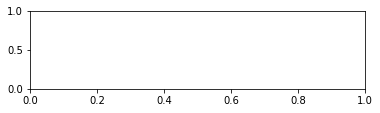

 32/714 [>.............................] - ETA: 1s0.107967103333


In [26]:
plt.subplots_adjust(hspace=0.8)
plt.show()

X_test = x
Y_test = y

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print(loss_and_metrics)

In [10]:
p_survived = model.predict_classes(tx.values)

 32/418 [=>............................] - ETA: 0s

In [11]:
submission = pd.DataFrame()
submission['PassengerId'] = test_ind
submission['Survived'] = p_survived

In [12]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,1


In [13]:
submission.to_csv('submission.csv', index=False)